In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Element Tracer Documentation
Basic documentation of the functions in gizmo_model and gizmo_agetracer

## Gizmo_model.py

Gizmo_model can be called as a part of the gizmo_analysis library if installed correctly (see elementTracer_tutorial for more info). 

In [34]:
from gizmo_analysis import gizmo_model
print(gizmo_model)

import gizmo_analysis as gizmo 
print(gizmo.gizmo_model)

<module 'gizmo_analysis.gizmo_model' from 'C:\\Users\\patel\\OneDrive\\Desktop\\research2\\gizmo_analysis\\gizmo_model.py'>
<module 'gizmo_analysis.gizmo_model' from 'C:\\Users\\patel\\OneDrive\\Desktop\\research2\\gizmo_analysis\\gizmo_model.py'>


There are a number of useful functions in gizmo_model, most of which are leveraged by gizmo_agetracer.py to make use of the element-tracer module in FIRE.
<hr>
The first of these is a general utility function for calling and storing simulation directories within a dictionary:
    
<b>name:</b>

    get_simulation_directory(dirkey = None)
    
<b>returns:</b>

    dict : full of directories to simulations on various machines, can be edited in gizmo_model.py 
    
<b>purpose:</b>

    returns a dictionary of directories
    
<b>parameters:</b>

    (str) 'dirkey' : key for dictionary entry of some simulation directory 
    
<b>Example:</b>

In [35]:
gizmo_model.get_simulation_directory('Peloton')

Edit directories in gizmo_model.py for better access to your simulations!


{'m12i_880': '/home/awetzel/scratch/m12i/m12i_r880',
 'm12i_7100': '/home/awetzel/scratch/m12i/m12i_r7100',
 'test': 'test'}

<hr>

Another function grabs the values for solar abundances from Asplund 2009.

<b>name:</b>

    get_sun_massfraction()
    
<b>returns:</b>

    dict with elements for keys and corresponding values for massfractions
    
<b>purpose:</b>

    returns a dictionary solar abundance values
    
<b>parameters:</b>

    (str) model : you may have different models for different solar abundances, so I wanted to keep this open
    
<b>Example:</b>

In [29]:
gizmo_model.get_sun_massfraction(model = 'fire2')

{'metals': 0.02,
 'helium': 0.28,
 'carbon': 0.00326,
 'nitrogen': 0.00132,
 'oxygen': 0.00865,
 'neon': 0.00222,
 'magnesium': 0.000931,
 'silicon': 0.00108,
 'sulfur': 0.000644,
 'calcium': 0.000101,
 'iron': 0.00173}

<hr>

Another function grabs the values for solar abundances from Asplund 2009.

<b>name:</b>

    element_yields()
    
<b>purpose:</b>

    returns a dictionary with yields for different feedback event types (CCSN, SNe Ia, Winds)
    
<b>parameters:</b>

    source [string]: one of 'ccsn', 'mannucci', 'maoz', or 'winds'
    
    includeZ [float, bool]: progenitor metallicity dependence (set to False by default)
    
    plot [bool]: will include a plot of the yields for a given feedback event type. Set True to plot, False is default.
        
<b>Example:</b>

In [30]:
gizmo_model.element_yields('cc')

{'metals': 0.195926,
 'helium': 0.369,
 'carbon': 0.0127,
 'nitrogen': 0.00456,
 'oxygen': 0.111,
 'neon': 0.0381,
 'magnesium': 0.0094,
 'silicon': 0.00889,
 'sulfur': 0.00378,
 'calcium': 0.000436,
 'iron': 0.00706}

<hr>

### Class: EventYieldDictionary
What fraction of a CCSN is in carbon? Iron? What about the same value for WDSN? This class allows you to initialize our expectations for these numbers and store them in a dictionary for ease of access. This boils down to 3 or 4 lines of code and a very simple pipeline.

<hr>
<b>name:</b>

    event_yield_dictionaries(self, fire_vers:str = 'fire2.1'):
    
<b>purpose:</b>

    stores all of the feedback massfractions and ejecta masses in a dictionary and returns them
    
<b>parameters:</b>

    self [class]: Make sure you initialize the class before trying to use this function. 
    
    fire_vers [string]: progenitor metallicity dependence (set to False by default)
        
<b>Example:</b>

In [31]:
eyd = gizmo_model.EventYieldDictionary.initialize_EYD()
eyd[0]

{'metals': 0.0319,
 'helium': 0.36,
 'carbon': 0.016,
 'nitrogen': 0.0041,
 'oxygen': 0.0118,
 'neon': 0,
 'magnesium': 0,
 'silicon': 0,
 'sulfur': 0,
 'calcium': 0,
 'iron': 0}

<hr>

### Class: feedback

This is where the heavy lifting begins

<b>name:</b>

    __init__ 
    
<b>purpose:</b>

    initializes the class
    
<b>parameters:</b>

    self , [class]
    time_span = None, [list, float, int] 
    source = 'any', [string]
    elem_name = False, # name of element we are interested in, [string]
    t_w = [1.0, 3.5, 100], # Discontinuities in the wind rate function [list of floats]
    t_cc = [3.4, 10.37, 37.53],  # Discontinuities in the CCSN rate function [list of floats]
    t_ia = [37.53],  # Discontinuity(ies) in the WDSN rate function [list of floats]
    t_dd = -1.1, # WDSN/SNeIa time delay exponent [float]
    n_ia = 2.6e-7, # WDSN/SNeIa normalization coefficient [float]
    n_cc = False, # CCSN normalization coefficient(s) ; plan is to have it read in a list of len(t_cc) [float]
    n_w = False, # Wind normalization coefficient(s) ; same plan as above [float]
    ia_model = 'maoz', [string]
    
<b>Example:</b>

    Initialization examples below

In [46]:
import numpy as np
from matplotlib import pyplot as plt

elem = None

winds = gizmo.gizmo_model.feedback(source = 'wind', elem_name = elem) # initializing a class for Stellar Winds
ccsn = gizmo.gizmo_model.feedback(source = 'cc', elem_name = elem) #initializing a class for CCSN
wdsn = gizmo.gizmo_model.feedback(source = 'wd', elem_name = elem) #initializing a class for Type Ia/WDSN 

<hr>

<b>names:</b>

    get_rate_wind, get_rate_cc, get_rate_wd
    
<b>returns:</b>

    3 things in tuple:
    array of rate value, array of corresponding ages, array of discontinuities

<b>purpose:</b>

    obtains the fractional mass loss rate for stellar winds, ccsn, and wdsn

<b>parameters:</b>

        Z: progenitor metallicity. Set to 1 by default, do not change for FIRE-2
        massloss: replaced, will be deprecated in future. 
        metal_mass_fraction: deprecated 
        plot: set to True to plot the results. 
    
<b>Example:</b>

    plot below

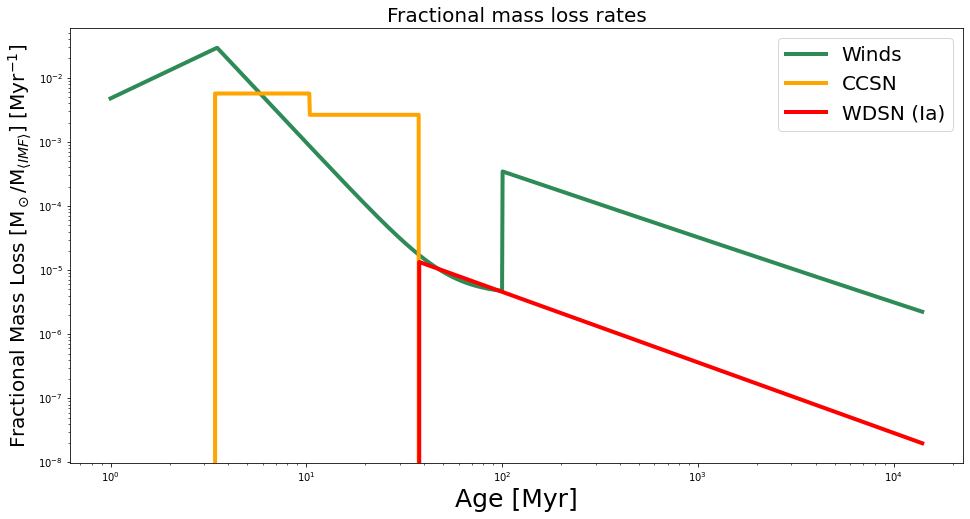

In [47]:
rate_wind, ages_wind, d_wind = winds.get_rate_wind()
rate_ccsn, ages_ccsn, d_ccsn = ccsn.get_rate_cc()
rate_wdsn, ages_wdsn, d_wdsn = wdsn.get_rate_wd()

fig, (ax1) = plt.subplots(1,1, figsize = (16,8))
ax1.loglog()
ax1.plot(ages_wind, rate_wind, lw = 4, c = 'seagreen', label = "Winds")
ax1.plot(ages_ccsn, rate_ccsn, lw = 4, c = 'orange', label = "CCSN")
ax1.plot(ages_wdsn, rate_wdsn, lw = 4, c = 'r', label = "WDSN (Ia)")
ax1.legend(fontsize = 20)
ax1.set_title("Fractional mass loss rates", size = 20)
ax1.set_xlabel("Age [Myr]", size = 25)
ax1.set_ylabel(r"Fractional Mass Loss [M$_\odot$/M$_{\langle IMF \rangle}$] [Myr$^{-1}$]", size = 20)
plt.show()